# **Quora Question Pair** 






## **Task - 3**


---
---

# **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.calibration import CalibratedClassifierCV

# **Data Importing**

In [ ]:
df = pd.read_csv(r'/content/basic_features.csv')

In [ ]:
df.head(2)

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,Q1_Length,Q2_Length,Q1_num_of_words,Q2_num_of_words,Num_of_same_words,clean_question1_stem,question1_length_stem,clean_question2_stem,question2_length_stem,clean_question1_lema,question1_length_lema,clean_question2_lema,question2_length_lema
0,0,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,play pok mon go korea,5,play pok mon go china,5,play pok mon go korea,5,play pok mon go china,5
1,1,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6,best side dish crab cake,5,good side dish buffalo chicken,5,best side dish crab cake,5,good side dish buffalo chicken,5


In [ ]:
df.shape

(100000, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unnamed: 0             100000 non-null  int64 
 1   id                     100000 non-null  int64 
 2   qid1                   100000 non-null  int64 
 3   qid2                   100000 non-null  int64 
 4   question1              100000 non-null  object
 5   question2              100000 non-null  object
 6   is_duplicate           100000 non-null  int64 
 7   Q1_Length              100000 non-null  int64 
 8   Q2_Length              100000 non-null  int64 
 9   Q1_num_of_words        100000 non-null  int64 
 10  Q2_num_of_words        100000 non-null  int64 
 11  Num_of_same_words      100000 non-null  int64 
 12  clean_question1_stem   99953 non-null   object
 13  question1_length_stem  100000 non-null  int64 
 14  clean_question2_stem   99960 non-null   object
 15  q

In [ ]:
df.isnull().sum()

Unnamed: 0                0
id                        0
qid1                      0
qid2                      0
question1                 0
question2                 0
is_duplicate              0
Q1_Length                 0
Q2_Length                 0
Q1_num_of_words           0
Q2_num_of_words           0
Num_of_same_words         0
clean_question1_stem     47
question1_length_stem     0
clean_question2_stem     40
question2_length_stem     0
clean_question1_lema     47
question1_length_lema     0
clean_question2_lema     40
question2_length_lema     0
dtype: int64

In [ ]:
df['clean_question1_stem'].mode()

0    new year resolut
dtype: object

In [ ]:
df['clean_question1_stem'] = df['clean_question1_stem'].fillna(df['clean_question1_stem'].mode()[0])

In [ ]:
df['clean_question2_stem'] = df['clean_question2_stem'].fillna(df['clean_question2_stem'].mode()[0])

In [ ]:
df['clean_question1_lema'] = df['clean_question1_lema'].fillna(df['clean_question1_lema'].mode()[0])


In [ ]:
df['clean_question2_lema'] = df['clean_question2_lema'].fillna(df['clean_question2_lema'].mode()[0])

In [ ]:
df.isnull().sum()

Unnamed: 0               0
id                       0
qid1                     0
qid2                     0
question1                0
question2                0
is_duplicate             0
Q1_Length                0
Q2_Length                0
Q1_num_of_words          0
Q2_num_of_words          0
Num_of_same_words        0
clean_question1_stem     0
question1_length_stem    0
clean_question2_stem     0
question2_length_stem    0
clean_question1_lema     0
question1_length_lema    0
clean_question2_lema     0
question2_length_lema    0
dtype: int64

# **Advance Features Extraction**

In [ ]:
pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

**Simple Ratio :** Measurement of edit distance (Minimum number of edits required to convert one sentence to other )

**Partial Ratio :** How much accuratly a part of sentence match to other sentence ("Chennai Super Kings", "Super Kings")

**Token Sort Ratio :** Tokenizing the string in question, sorting the tokens alphabetically, and then joining them back into a string

**Token Set Ratio :** Tokenize both strings,split the tokens into two groups of intersection and remainder. We use those sets to build up a comp

**Last_Word :** Checks if last word is same in both Q1 and Q2

**First_Word :** Checks if First word is same in both Q1 and Q2

**Length_diff :** Finds the length diffrence between Q1 and Q2
















In [ ]:
df['Simple_Ratio']=df.apply(lambda x: fuzz.ratio(x['clean_question1_lema'],x['clean_question2_lema']) ,axis=1)

df['Partial_Ratio']=df.apply(lambda x: fuzz.partial_ratio(x['clean_question1_lema'],x['clean_question2_lema']) ,axis=1)

df['Token_Sort_Ratio']=df.apply(lambda x: fuzz.token_sort_ratio(x['clean_question1_lema'],x['clean_question2_lema']) ,axis=1)

df['Token_Set_Ratio']=df.apply(lambda x: fuzz.token_set_ratio(x['clean_question1_lema'],x['clean_question2_lema']) ,axis=1)

In [ ]:
df['Last_Word']=df.apply(lambda x: int(x['question1'].split()[-1] == x['question2'].split()[-1]),axis=1)


df['First_Word']=df.apply(lambda x: int(x['question1'].split()[0] == x['question2'].split()[0]),axis=1)


df['Length_diff']=df.apply(lambda x: abs(len(x['question1'].split())-len(x['question2'].split())),axis=1)

In [ ]:
df.head(2)

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,Q1_Length,Q2_Length,Q1_num_of_words,Q2_num_of_words,Num_of_same_words,clean_question1_stem,question1_length_stem,clean_question2_stem,question2_length_stem,clean_question1_lema,question1_length_lema,clean_question2_lema,question2_length_lema,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word,Length_diff
0,0,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,play pok mon go korea,5,play pok mon go china,5,play pok mon go korea,5,play pok mon go china,5,81,81,71,83,0,1,0
1,1,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6,best side dish crab cake,5,good side dish buffalo chicken,5,best side dish crab cake,5,good side dish buffalo chicken,5,59,62,56,59,0,1,2


In [ ]:
def common_StopWord_Ratio(q1,q2):
    q1_token=q1.split() # Splitting Words to make then tokens
    q2_token=q2.split()
    
    # We are takking out all the stopwords in both the Question and finding there intersection (Common stopwords)
    q1=set([word for word in q1_token if word in stopwords])
    q2=set([word for word in q2_token if word in stopwords])
    common=q1.intersection(q2)
    ratio=len(common)/len(set(q1_token))+len(set(q2_token))
    
    return ratio


def common_Token_Ratio(q1,q2):
    q1_token=q1.split()
    q2_token=q2.split()
    # We are takking out all the token in both the Question and finding there intersection (Common tokens)
    q1=set([x for x in q1_token if x not in stopwords])
    q2=set([x for x in q2_token if x not in stopwords])
    
    common=q1.intersection(q2)
    ratio=len(common)/len(set(q1_token))+len(set(q2_token))
    
    return ratio


def get_longest_substr_ratio(a, b):
    
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return round(len(strs[0]) / (min(len(a), len(b)) + 1),5)

def common_Characters(q1,q2):
    q1="".join(q1.split())
    q2="".join(q2.split())
    c=0
    d=dict(Counter(q1))
    for i in q2:
        if i in d and d[i]!=0:
            c+=1;d[i]-=1
    return c    

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'qid1', 'qid2', 'question1', 'question2',
       'is_duplicate', 'Q1_Length', 'Q2_Length', 'Q1_num_of_words',
       'Q2_num_of_words', 'Num_of_same_words', 'clean_question1_stem',
       'question1_length_stem', 'clean_question2_stem',
       'question2_length_stem', 'clean_question1_lema',
       'question1_length_lema', 'clean_question2_lema',
       'question2_length_lema', 'Simple_Ratio', 'Partial_Ratio',
       'Token_Sort_Ratio', 'Token_Set_Ratio', 'Last_Word', 'First_Word',
       'Length_diff'],
      dtype='object')

In [ ]:
df.head(2)

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,Q1_Length,Q2_Length,Q1_num_of_words,Q2_num_of_words,Num_of_same_words,clean_question1_stem,question1_length_stem,clean_question2_stem,question2_length_stem,clean_question1_lema,question1_length_lema,clean_question2_lema,question2_length_lema,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word,Length_diff
0,0,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,play pok mon go korea,5,play pok mon go china,5,play pok mon go korea,5,play pok mon go china,5,81,81,71,83,0,1,0
1,1,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6,best side dish crab cake,5,good side dish buffalo chicken,5,best side dish crab cake,5,good side dish buffalo chicken,5,59,62,56,59,0,1,2


# **Dropping Unwanted Features**

In [ ]:
df= df.drop(['Unnamed: 0', 'id', 'qid1', 'qid2', 'question1', 'question2','clean_question1_stem','clean_question2_stem','clean_question1_lema','clean_question2_lema'],axis = 1)

In [ ]:
df

,is_duplicate,Q1_Length,Q2_Length,Q1_num_of_words,Q2_num_of_words,Num_of_same_words,question1_length_stem,question2_length_stem,question1_length_lema,question2_length_lema,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word,Length_diff
0,0,34,34,8,8,7,5,5,5,5,81,81,71,83,0,1,0
1,0,53,51,11,9,6,5,5,5,5,59,62,56,59,0,1,2
2,0,96,45,16,8,2,8,4,8,4,22,32,22,22,0,0,8
3,1,44,52,7,9,4,4,4,4,4,82,82,100,100,0,1,2
4,1,38,29,9,7,3,5,4,5,4,73,65,78,88,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,36,35,7,7,6,3,3,3,3,100,100,100,100,1,1,0
99996,0,86,97,16,15,5,7,8,7,8,53,54,50,60,0,0,1
99997,1,43,42,7,6,5,4,4,4,4,100,100,100,100,1,0,1
99998,0,35,47,6,7,2,3,3,3,3,42,64,51,51,1,0,1


In [ ]:
# saving  dataframe to csv

df.to_csv('Advance_features_quora.csv')

#**EXPLORATORY DATA ANALYSIS**

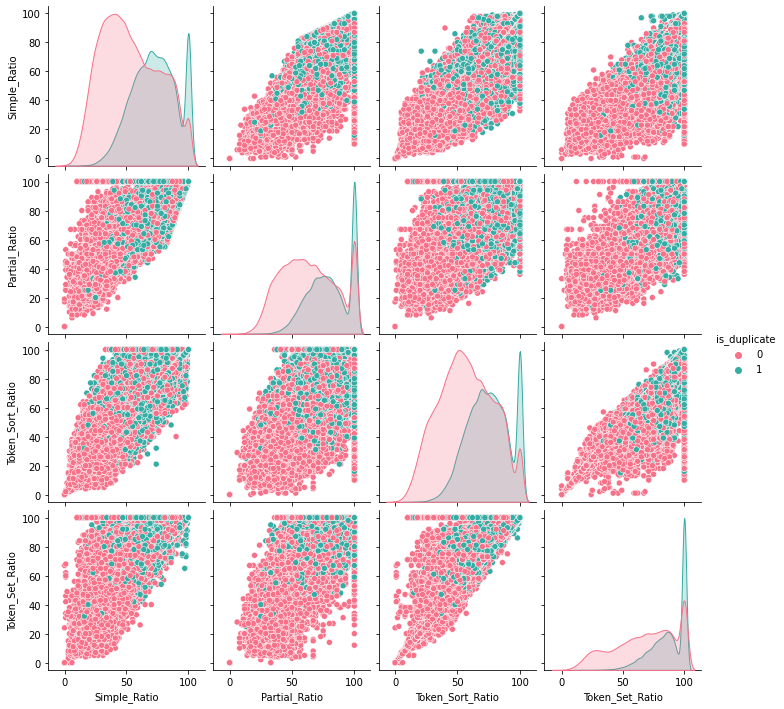

In [ ]:

n = df.shape[0]
sns.pairplot(df[['Simple_Ratio', 'Partial_Ratio', 'Token_Sort_Ratio', 'Token_Set_Ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['Simple_Ratio', 'Partial_Ratio', 'Token_Sort_Ratio', 'Token_Set_Ratio'], palette="husl")
plt.show()

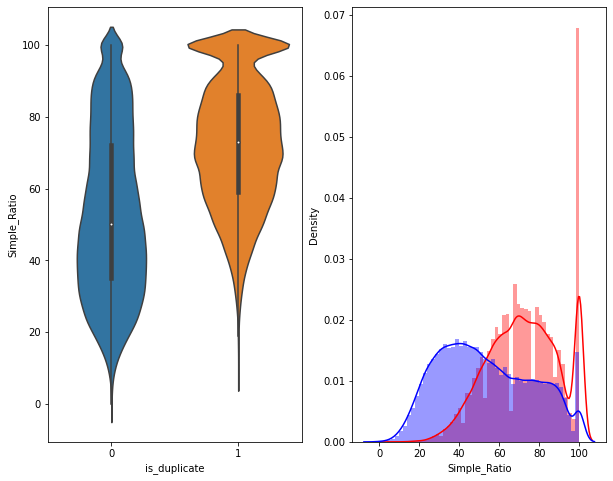

In [ ]:
# Distribution of the Simple_Ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'Simple_Ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['Simple_Ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['Simple_Ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

## **Observation:**

The above ***Violin*** ***plot*** describes about probability density of data at differnet values for features *is_duplicate* and *Simple_ratio*

The above **Distplot** describes about the distributions for normalized Simple_Ratio have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high Ratio similarity

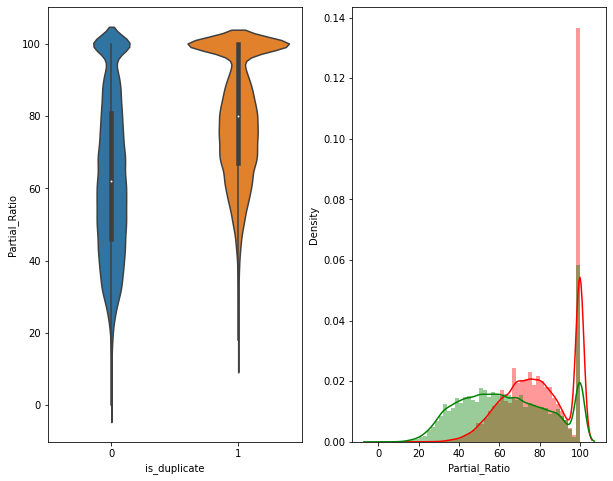

In [ ]:
# Distribution of the Partial_Ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'Partial_Ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['Partial_Ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['Partial_Ratio'][0:] , label = "0" , color = 'green' )
plt.show()

**Observation:**


The above Violin plot describes about probability density of data at differnet values for features is_duplicate and Partial_ratio

The above Distplot describes about the distributions for normalized Partial_Ratio have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high Ratio similarity

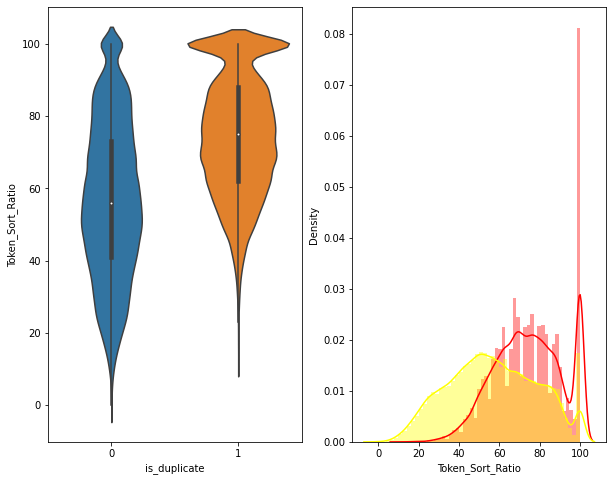

In [ ]:
# Distribution of the Token_Sort_Ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'Token_Sort_Ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['Token_Sort_Ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['Token_Sort_Ratio'][0:] , label = "0" , color = 'yellow' )
plt.show()

**Observation**:

The above Violin plot describes about probability density of data at differnet values for features is_duplicate and Token_Sort_Ratio

The above Distplot describes about the distributions for normalized Token_Sort_Ratio have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high Ratio similarity

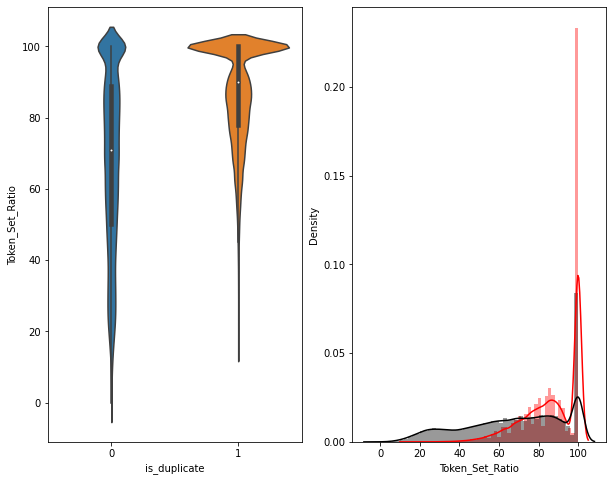

In [ ]:
# Distribution of the Token_Set_Ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'Token_Set_Ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['Token_Set_Ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['Token_Set_Ratio'][0:] , label = "0" , color = 'black' )
plt.show()

**Observation**:

 The above Violin plot describes about probability density of data at differnet values for features is_duplicate and Token_Set_Ratio

The above Distplot describes about the distributions for normalized Token_Set_Ratio have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high Ratio similarity



In [ ]:
df.head(1)

,is_duplicate,Q1_Length,Q2_Length,Q1_num_of_words,Q2_num_of_words,Num_of_same_words,question1_length_stem,question2_length_stem,question1_length_lema,question2_length_lema,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word,Length_diff
0,0,34,34,8,8,7,5,5,5,5,81,81,71,83,0,1,0


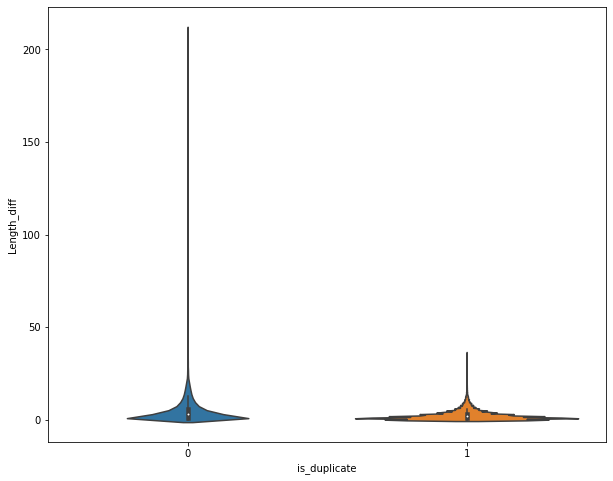

In [ ]:
# Distribution of the Token_Set_Ratio
plt.figure(figsize=(10, 8))


sns.violinplot(x = 'is_duplicate', y = 'Length_diff', data = df )


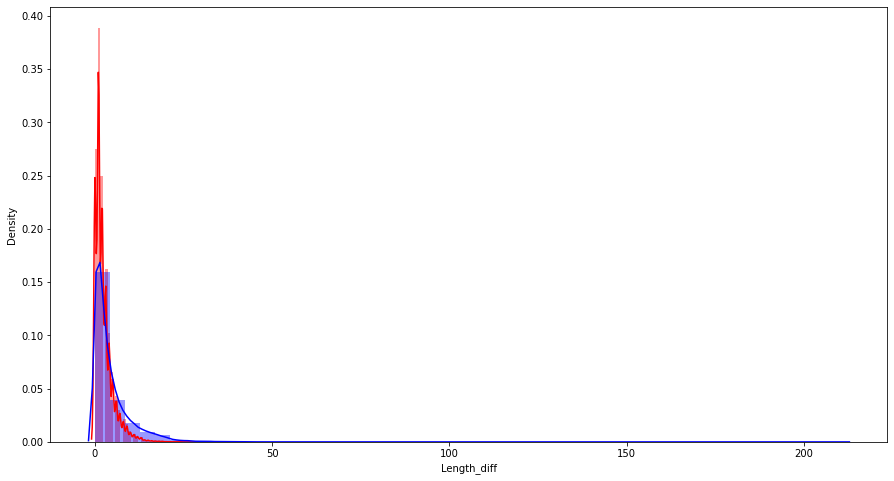

In [ ]:

plt.figure(figsize=(15, 8))
sns.distplot(df[df['is_duplicate'] == 1.0]['Length_diff'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['Length_diff'][0:] , label = "0" , color = 'blue' )
plt.show()

# **Machine Learning Models**

In [ ]:
df.head(5)

,is_duplicate,Q1_Length,Q2_Length,Q1_num_of_words,Q2_num_of_words,Num_of_same_words,question1_length_stem,question2_length_stem,question1_length_lema,question2_length_lema,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word,Length_diff
0,0,34,34,8,8,7,5,5,5,5,81,81,71,83,0,1,0
1,0,53,51,11,9,6,5,5,5,5,59,62,56,59,0,1,2
2,0,96,45,16,8,2,8,4,8,4,22,32,22,22,0,0,8
3,1,44,52,7,9,4,4,4,4,4,82,82,100,100,0,1,2
4,1,38,29,9,7,3,5,4,5,4,73,65,78,88,0,1,2


In [ ]:
target = df['is_duplicate']
data = df.drop("is_duplicate",axis=1)

In [ ]:
print(data.shape)
print(target.shape)

(100000, 16)
(100000,)


In [ ]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(100000, 16)


In [ ]:
# splitting the data into train-test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data, \
                                                   target, \
                                                   test_size = 0.20, \
                                                   random_state = 0)

In [ ]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (80000, 16)
Number of data points in test data : (20000, 16)


# **Confusion Matrix**

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1

    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# **Building a random model (Finding worst-case log-loss)**

In [ ]:
test_len = len(y_test)

Log loss on Test Data using Random Model 0.88634182830674


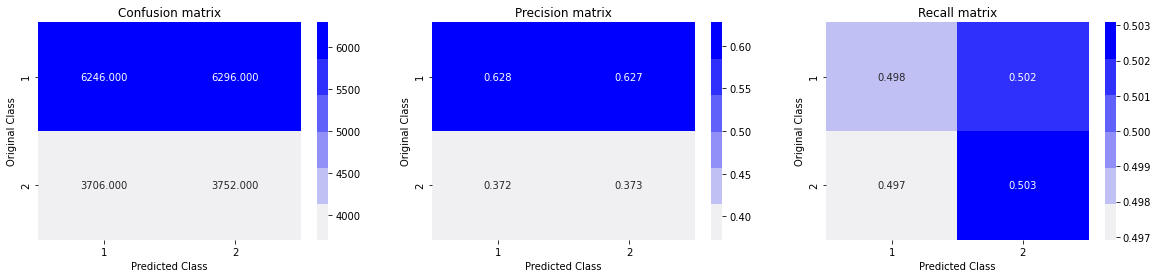

In [ ]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

## **Observation:**
*Log loss on Test Data using Random Model 0.89 which is worst log loss model so reduce the log loss score we are performing Logestic Rregression with hyperparameter Tuning*

*For log loss 0 is good and 1 is worst*


# **Logistic Regression with Hyperparameter Tuning**

For values of alpha =  1e-05 The log loss is: 0.5478860713815852
For values of alpha =  0.0001 The log loss is: 0.5449066461171483
For values of alpha =  0.001 The log loss is: 0.5454714997569333
For values of alpha =  0.01 The log loss is: 0.5462431893665
For values of alpha =  0.1 The log loss is: 0.5499279372822296
For values of alpha =  1 The log loss is: 0.554884377689931
For values of alpha =  10 The log loss is: 0.5599692749598869


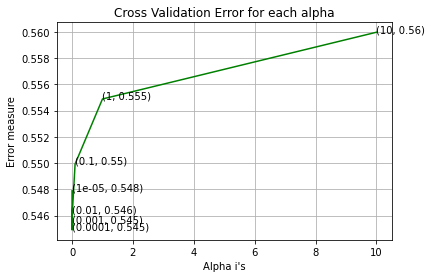

For values of best alpha =  0.0001 The train log loss is: 0.5447378500260273
For values of best alpha =  0.0001 The test log loss is: 0.5449066461171483
Total number of data points : 20000


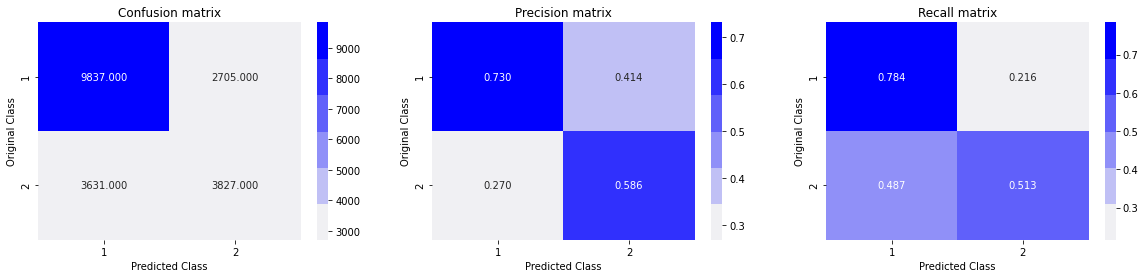

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparameter for SGD classifier

log_error_array = []
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=2)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-10))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-10))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
  ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=2)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-10))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-10))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# **Observation:**

For values of best alpha = 0.0001 The train log loss is: 0.5447378500260273 For values of best alpha = 0.0001 The test log loss is: 0.5447378500260273

These are the results after performing Logestic regression with Hyperparameter Tuning** 

# **Logistic Regression with Grid Search**

In [ ]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.6832874999999999


# **Linear SVM with hyperparameter tuning**

For values of alpha =  1e-05 The log loss is: 0.5476899765624718
For values of alpha =  0.0001 The log loss is: 0.5917890571175313
For values of alpha =  0.001 The log loss is: 0.6106920704947059
For values of alpha =  0.01 The log loss is: 0.6165439018918017
For values of alpha =  0.1 The log loss is: 0.6172424997693171
For values of alpha =  1 The log loss is: 0.6604906458187804
For values of alpha =  10 The log loss is: 0.6604906458187847


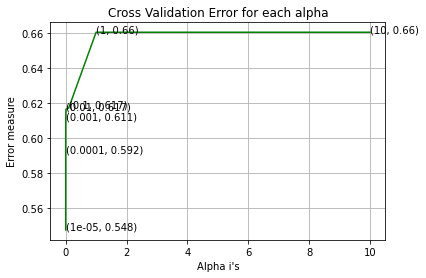

For values of best alpha =  1e-05 The train log loss is: 0.5480164157629326
For values of best alpha =  1e-05 The test log loss is: 0.5476899765624718
Total number of data points : 20000


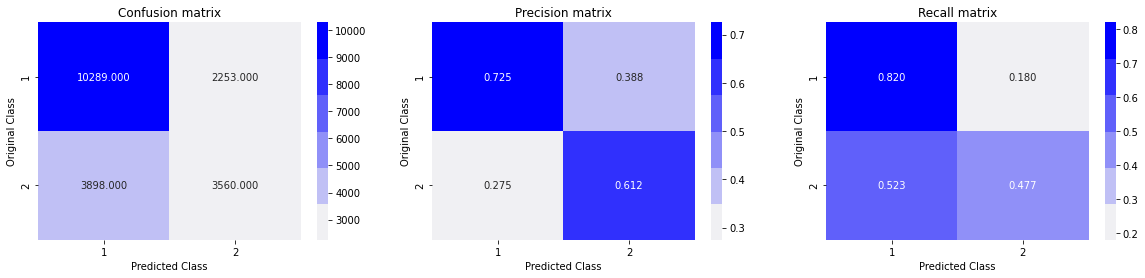

In [ ]:
# hyperparameter with L1

alpha = [10 ** x for x in range(-5, 2)] # hyperparameter for SGD classifier.



log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.5536037000919991
For values of alpha =  0.0001 The log loss is: 0.579579074487872
For values of alpha =  0.001 The log loss is: 0.5994299676529231
For values of alpha =  0.01 The log loss is: 0.6151876924095568
For values of alpha =  0.1 The log loss is: 0.5721247150986075
For values of alpha =  1 The log loss is: 0.5526375696892897
For values of alpha =  10 The log loss is: 0.56153984766774


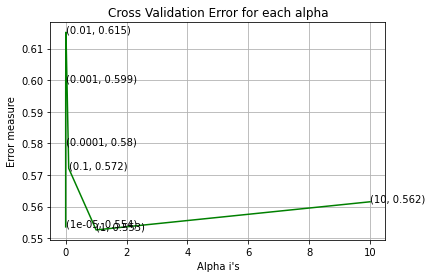

For values of best alpha =  1 The train log loss is: 0.5514811661853865
For values of best alpha =  1 The test log loss is: 0.5526375696892897
Total number of data points : 20000


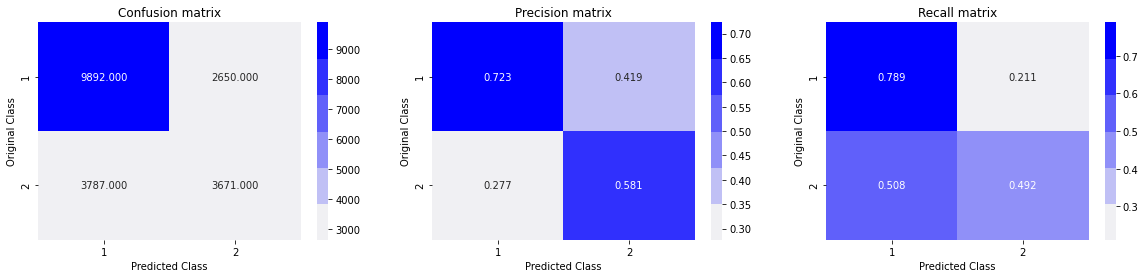

In [ ]:
# hyperparameter with L2

alpha = [10 ** x for x in range(-5, 2)] # hyperparameter for SGD classifier.




log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=40)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=40)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# **Random Forest with Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC

estimators =  100 Train Log Loss  0.1300801444855785 Test Log Loss  0.47113608752779035
estimators =  150 Train Log Loss  0.12951880187620887 Test Log Loss  0.47056750489402227
estimators =  200 Train Log Loss  0.12957082104641535 Test Log Loss  0.46782082368536587
estimators =  300 Train Log Loss  0.12935241514838905 Test Log Loss  0.4644738188027834
estimators =  400 Train Log Loss  0.12935631818737148 Test Log Loss  0.462843826971321
estimators =  600 Train Log Loss  0.12929783775523138 Test Log Loss  0.4639616379816283
estimators =  800 Train Log Loss  0.12927274553273052 Test Log Loss  0.461725756436557


Text(0, 0.5, 'Log Loss')

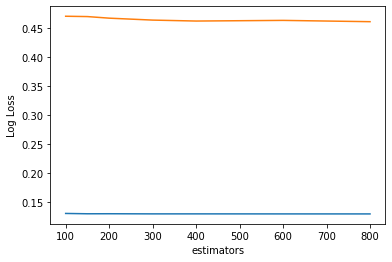

In [ ]:
#Random Forest with different values of estimators

estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = RFC(n_estimators=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators')
plt.ylabel('Log Loss')

# **Observations**
For different values  of  estimaters in Random Forest test log loss we are getting as 0.46 to 0.47

Depth =  5 Train Log Loss  0.5041376951541853 Test Log Loss  0.5064421233256937
Depth =  10 Train Log Loss  0.4489897730670751 Test Log Loss  0.4748286636121834
Depth =  12 Train Log Loss  0.4157395260243374 Test Log Loss  0.4680201998480072
Depth =  15 Train Log Loss  0.3529913830662518 Test Log Loss  0.4620916472057321
Depth =  20 Train Log Loss  0.24229690560763426 Test Log Loss  0.46123790461814496
Depth =  25 Train Log Loss  0.1730297694846438 Test Log Loss  0.46849722969035384
Depth =  50 Train Log Loss  0.1299531054530457 Test Log Loss  0.4790842107894389


Text(0, 0.5, 'Log Loss')

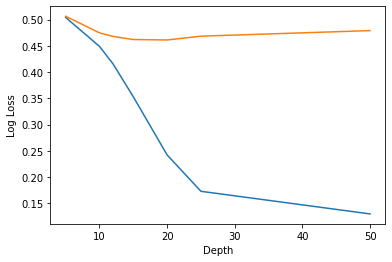

In [ ]:
#Random Forest with different values of Depth

Depth = [5,10,12,15,20,25,50]
test_scores = []
train_scores = []
for i in Depth:
    clf = RFC(n_estimators=100,max_depth=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('Depth = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(Depth,train_scores,label='Train Log Loss')
plt.plot(Depth,test_scores,label='Test Log Loss')
plt.xlabel('Depth') 
plt.ylabel('Log Loss')

# **Observations**
For Depth =  5 we are getting  the best results for  Train Log Loss 
 0.504 and  Test Log Loss  0.506

# **CONCLUSION :**

# **Logistic Regression with Hyperparameter Tuning**

For values of best alpha =  0.0001 The train log loss is: 0.5447378500260273

For values of best alpha =  0.0001 The test log loss is: 0.5449066461171483

# **Linear SVM with hyperparameter tuning**

For values of best alpha =  1 The train log loss is: 0.5514811661853865

For values of best alpha =  1 The test log loss is: 0.5526375696892897


# **Random Forest with Hyperparameter Tuning**

**For Different-Estimaters**

estimators =  100 Train Log Loss  0.1300801444855785 Test Log Loss  0.47113608752779035

estimators =  150 Train Log Loss  0.12951880187620887 Test Log Loss  0.47056750489402227


**For Different-Depths**

 Depth =  5 Train Log Loss  0.5041376951541853 Test Log Loss  0.5064421233256937

Depth =  10 Train Log Loss  0.4489897730670751 Test Log Loss  0.4748286636121834

# **Final Counclusion:**



Algorithms | HyperParameter |  Train Log-Loss  |  Test Log-Loss
-------------------|------------------|---------------------|-------------
Logestic Regression       | Alpha = 0.0001    | 0.5447   | 0.5449
Support Vector Machine    | Alpha = 1.0    |0.5518    |0.5526
Random Forest| Estimator = 100|0.1300|0.4711
Random Forest |Depth = 5| 0.5041|0.5064

**Hence Linear Support Vector Machine is giving the best results for both Training and Testing set**



